# Project 1


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('./Data/young-people-survey-responses.csv')
print(data.head(5))

   Unnamed: 0  Music  Techno  Movies  History  Mathematics  Pets  Spiders  \
0           0    5.0     1.0     5.0      1.0          3.0   4.0      1.0   
1           1    4.0     1.0     5.0      1.0          5.0   5.0      1.0   
2           2    5.0     1.0     5.0      1.0          5.0   5.0      1.0   
3           3    5.0     2.0     5.0      4.0          4.0   1.0      5.0   
4           4    5.0     2.0     5.0      3.0          2.0   1.0      1.0   

   Loneliness  Parents' advice   Internet usage  Finances   Age  Siblings  \
0         3.0              4.0  few hours a day       3.0  20.0       1.0   
1         2.0              2.0  few hours a day       3.0  19.0       2.0   
2         5.0              3.0  few hours a day       2.0  20.0       2.0   
3         5.0              2.0  most of the day       2.0  22.0       1.0   
4         3.0              3.0  few hours a day       4.0  20.0       1.0   

   Gender Village - town  
0  female        village  
1  female           

In [18]:
print(data.describe())

        Unnamed: 0        Music       Techno       Movies      History  \
count  1010.000000  1007.000000  1003.000000  1004.000000  1008.000000   
mean    504.500000     4.731877     2.338983     4.613546     3.207341   
std     291.706188     0.664049     1.324099     0.694700     1.263523   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%     252.250000     5.000000     1.000000     4.000000     2.000000   
50%     504.500000     5.000000     2.000000     5.000000     3.000000   
75%     756.750000     5.000000     3.000000     5.000000     4.000000   
max    1009.000000     5.000000     5.000000     5.000000     5.000000   

       Mathematics        Pets      Spiders   Loneliness  Parents' advice  \
count  1007.000000  1006.00000  1005.000000  1009.000000      1008.000000   
mean      2.334657     3.33499     2.825871     2.887017         3.265873   
std       1.352496     1.54537     1.543695     1.131757         0.865736   
min       1.000000     1.

In [19]:
print(data.isna().sum())

Unnamed: 0         0
Music              3
Techno             7
Movies             6
History            2
Mathematics        3
Pets               4
Spiders            5
Loneliness         1
Parents' advice    2
Internet usage     0
Finances           3
Age                7
Siblings           6
Gender             6
Village - town     4
dtype: int64


<Axes: >

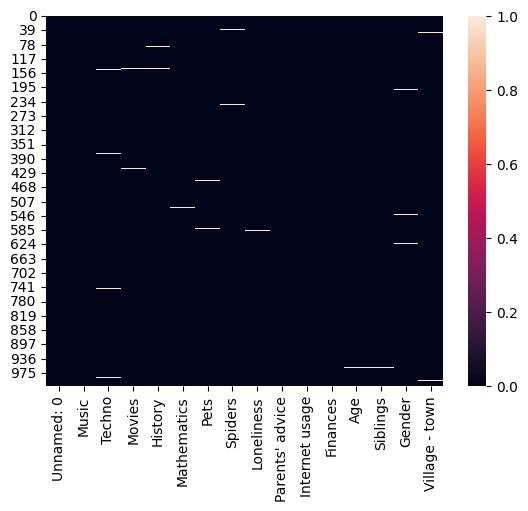

In [20]:
sns.heatmap(data.isna())

## Drop Variables that are not necessary

## Missing Values


In [21]:
percent_missing_vals = data.agg(lambda x: x.isna().mean() * 100)

print(percent_missing_vals)
# None are over 10 percent

Unnamed: 0         0.000000
Music              0.297030
Techno             0.693069
Movies             0.594059
History            0.198020
Mathematics        0.297030
Pets               0.396040
Spiders            0.495050
Loneliness         0.099010
Parents' advice    0.198020
Internet usage     0.000000
Finances           0.297030
Age                0.693069
Siblings           0.594059
Gender             0.594059
Village - town     0.396040
dtype: float64


In [22]:
# fewer than 10%, fill with min, max, mean or median.


## Encode Categorical Variables

## Cross Validation

## Scaling